##**Sebastian Gaviria Giraldo** **C.C. 1017270713**

---


##**Simulación del movimiento de un péndulo doble utilizando matplotlib**

---

En general, un péndulo doble o doble péndulo, es un sistema compuesto por dos péndulos, con el segundo colgando del extremo del primero. En el caso más simple, se trata de dos péndulos simples, con el inferior colgando de la masa pendular del superior.

Para este caso, se realiza el estudio para un doble péndulo plano, donde el movimiento de ambas partículas es coplanario y en las direcciones $x$ y $y$. Este sistema físico posee dos grados de libertad y exhibe un rico comportamiento dinámico. Su movimiento está gobernado por dos ecuaciones diferenciales ordinarias acopladas. Por encima de cierta energía, su movimiento es caótico.

**Cinemática**

Sólo estamos interesados en encontrar las expresiones de la posición, la velocidad, la aceleración y en términos de las variables que especifican el estado del doble péndulo, sin interesarnos por las fuerzas actuantes. Nos serviremos de las siguientes coordenadas:

* $x$,$y$ son las posiciones horizontal y vertical de la masa de un sólo péndulo respectivamente.
* $\theta$ es el ángulo de un sólo péndulo respecto a la vertical ($\theta$ es vertical hacia abajo, antihorario es positivo)
* l es la longitud de la varilla (éste es un parámetro constante).

Asociaremos al péndulo superior el subíndice 1, y al de abajo el subíndice 2. Pondremos el origen de coordenadas en el punto de pivote del péndulo superior. El sentido de las ordenadas crecientes se toma hacia arriba.

A partir de consideraciones trigonométricas escribimos las expresiones de las posiciones $x_1$, $y_1$, $x_2$, $y_2$ en términos de los ángulos $θ_1$, $θ_2$:

$$x_1 = l_1\sin{\theta_1}$$
$$y_1 = -l_1\cos{\theta_1}$$
$$x_2 = x_1 + l_2\sin{\theta_2}$$
$$y_2 = y_1 -l_2\cos{\theta_2}$$

Derivando dos veces estas ecuaciones con respecto al tiempo obtenemos las siguientes ecuaciones:

$$\ddot x_1 = -\dot \theta^2_1l_1\sin{\theta_1} + \ddot \theta^2_1l_1\cos{\theta_1}$$
$$\ddot y_1 = \dot \theta^2_1l_1\cos{\theta_1} + \ddot \theta^2_1l_1\sin{\theta_1}$$
$$\ddot x_2 = \ddot x_1 -\dot \theta^2_2l_2\sin{\theta_2} + \ddot \theta^2_2l_2\cos{\theta_2}$$
$$\ddot y_2 = \ddot y_1 +  \dot \theta^2_2l_2\cos{\theta_2} + \ddot \theta^2_2l_2\sin{\theta_2}$$

Ahora, tengamos en cuenta que las fuerzas que actúan sobre los péndulos son la tensión $T$ de las varillas, las masas $m_i$ de los péndulos y la aceleración de la gravedad $g$.

Usaremos la ley de Newton $F=ma$, escribiendo por separado las ecuaciones de las componentes verticales y horizontales de las fuerzas.

Sobre la masa  $m_1$ actúan la tensión en la parte superior de la varilla $T_1$, la tensión en la parte inferior de la varilla $T_2$, y la gravedad $-m_1g$:

$$m_1\ddot x_1 = -T_1\sin \theta _1+T_2\sin \theta _2$$
$$m_1\ddot y_1=T_1\cos \theta _1-T_2\cos \theta _2-m_1g$$

Sobre la masa $m_2$, actúan la tensión $T_2$ y la gravedad $–m_2g$:

$$m_2\ddot x_2=-T_2\sin \theta _2$$
$$m_2\ddot y_2=T_2\cos \theta _2-m_2g$$ \\

**Ecuaciones de Movimiento**

A partir de las ecuaciones anteriores, tras realizar numerosas operaciones algebraicas con la finalidad de encontrar las expresiones de $\ddot \theta _1$, $\ddot \theta _2$ en términos de $\theta _1$, $\dot \theta _1$, $\theta _2$,$\dot \theta _2$, llegaríamos a las ecuaciones de movimiento para el péndulo doble:

$$\ddot \theta_1 = \frac{-g(2m_1 + m_2) \sin{\theta_1}-m_2g \sin{(\theta_1-2\theta_2)}-2 \sin{(\theta_1-\theta_2)}m_2(\dot \theta_2^2l_2+\dot \theta_1^2l_1\cos{(\theta_1-\theta_2)})}{l_1(2m_1+m_2-m_2 \cos{(2\theta_1-2\theta_2)})}$$ \\

$$\ddot \theta_2 = \frac{2 \sin{(\theta_1-\theta_2)} ( \dot \theta_1^2l_1(m_1+m_2)+g(m_1+m_2) \cos{\theta_1} + \dot \theta_2^2l_2m_2 \cos{(\theta_1-\theta_2)})}{l_2(2m_1+m_2-m_2 \cos{(2\theta_1-2\theta_2))}}$$

---


#**Código:**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from IPython.display import HTML
import matplotlib.animation as animation
from collections import deque

In [24]:
def pendulos(l1, l2, m1, m2, θ1, θ2, ω1, ω2, T, N):
    
    ''' 
    
    l1, l2 son las longitudes de las varillas
    m1, m2 son las masas del péndulo en
    θ1, θ2 son los ángulos iniciales del péndulo en radianes
    ω1, ω2 son las velocidades iniciales del péndulo en rad/s
    T es el tiempo de simulación
    N es el número de pasos de la curva
    
    '''
    
    
    ##Desarrollo numérico##
    

    #Array de condiciones iniciales
    cond_ini = np.radians([θ1, ω1, θ2, ω2]) #Nótese que d(θi)/dt = ωi para i = 1,2

    #Matriz de tiempos 
    dt = 0.02
    t = np.arange(0, T, dt)


    #Construimos la función estándar necesaria para resolver las EDOs del péndulo doble
    def EDO(cond_ini, t):
        
        dydx = np.zeros_like(cond_ini) #Creamos un array de ceros que tenga el tamaño y la forma del array de condiciones iniciales
        
        dydx[0] = cond_ini[1] #Asignamos la primera derivada de la variable dinámica θ1 (ω1)
        
        Δ = cond_ini[0] - cond_ini[2] #Ya que será frecuente el uso de esta variable, definimos la resta entre θ1 y θ2
        
        #Según las ecuaciones vistas previamente, definimos la expresión para la segunda derivada de θ1
        den1 = (2*m1+m2) * l1 - m2 * l1 * np.cos(2*Δ) #Denominador de la expresión para la segunda derivada de θ1
        dydx[1] = (- 9.8*(2*m1+m2)*np.sin(cond_ini[0]) - m2*9.8*np.sin(Δ - cond_ini[2]) - 2*np.sin(Δ)*m2*l2*cond_ini[3]*cond_ini[3] 
                - cond_ini[1]*cond_ini[1]*l1*np.sin(2*Δ) ) / (den1) #Expresión para la segunda derivada de θ1 (2do elemento del array dydx)
        
        dydx[2] = cond_ini[3] #Asignamos la segunda derivada de la variable dinámica θ2 (ω2)
        
        den2 = (l2/l1) * den1 #Denominador de la expresión para la segunda derivada de θ2
        dydx[3] = ( 2*(m1+m2)*l1*cond_ini[1]*cond_ini[1]*np.sin(Δ) + 2*9.8*(m1+m2)*np.cos(cond_ini[0])*np.sin(Δ)
                + cond_ini[3]*cond_ini[3]*l2*m2*np.sin(2*Δ) ) / (den2) #Expresión para la segunda derivada de θ2 (4to elemento de dydx)
        
        return dydx #La función entrega un array con cuatro elementos (ω1, d(ω1)/dt, ω2, d(ω2)/dt)

    
    #Resolvemos la EDO usando scipy.integrate, método Runge-Kutta
    y = integrate.odeint(EDO, cond_ini, t)

    x1 = l1*np.sin(y[:, 0]) #Asignamos la variable de movimiento horizontal para la masa 1 teniendo en cuenta el cambio x1 = l1sin(θ1)
    y1 = -l1*np.cos(y[:, 0]) #Asignamos la variable de movimiento vertical para la masa 1 teniendo en cuenta el cambio y1 = -l1cos(θ1)

    x2 = l2*np.sin(y[:, 2]) + x1 #Asignamos la variable de movimiento horizontal para la masa 2 teniendo en cuenta el cambio x2=x1+l2sin(θ1)
    y2 = -l2*np.cos(y[:, 2]) + y1 #Asignamos la variable de movimiento vertical para la masa 2 teniendo en cuenta que es y2=-l2cos(θ1)+y1

    
    ##Desarrollo para la animación##
    

    fig = plt.figure(figsize=(7, 7)) #Guardamos la variable fig, importante para la animación gráfica
    ax = fig.add_subplot(autoscale_on=False, xlim=(-l1-l2, l1+l2), ylim=(-l1-l2, 2)) #Guardamos la info de la gráfica y sus límites (x,y)
    ax.set_aspect('auto', adjustable='box', anchor=(10,10), share=True) #Aspectos estéticos
    ax.text(-l1-l2, 2.1, f'Simulación del Péndulo Doble para $θ_1$ = {θ1}$^∘$ , $θ_2$ = {θ2}$^∘$', size = 14) #Título y ubicación de éste
    ax.grid() #Malla para la gráfica

    O = ax.plot(0,0, color='r', marker='s', markeredgecolor='k', lw = 6, ms = 20) #Graficación del pivote rojo que soporta los péndulos
    o1, = ax.plot([],[], color='b', marker='o', markeredgecolor='k', lw = 6, ms = 20) #Graficación del péndulo de masa m1
    o2, = ax.plot([],[], color='b', marker='o', markeredgecolor='k', lw = 6, ms = 20) ##Graficación del péndulo de masa m2
    var, = ax.plot([], [], '-', lw=4, color='k') #Graficación para las varillas que unen las masas m1 y m2
    trayect, = ax.plot([], [], ',--', lw=2, color='m') #Graficación de la trayectoria de la masa m2
    time_template = 'Tiempo = %.1fs' #Interfaz para el contador de tiempo de animación
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes, size= 15.8) #Ubicación y estética de dicho contador
    
    #Definimos dos colecciones de tipo deque, cuyo tamaño máximo será el número de iteraciones N
    #Estas colecciones determinarán el "estado presente" de la masa m2 en la iteración i de las coordenadas (x,y)
    #Usamos deque para aprovechar su método appendleft, el cuál será útil posteriormente
    history_x, history_y = deque(maxlen=N), deque(maxlen=N)
    
    #Definimos una función estándar (animate) importante para la actualización constante de la animación
    def animate(i):
        
        #Se crean listas para x,y tales que contengan la coordenada 0, y el valor i-ésimo de x1,x2 y y1,y2 respectivamente
        thisx = [0, x1[i], x2[i]]
        thisy = [0, y1[i], y2[i]]
    
        p1x = [x1[i], x1[i]]
        p1y = [y1[i], y1[i]]
    
        p2x = [x2[i], x2[i]]
        p2y = [y2[i], y2[i]]
        
        if i == 0:
            history_x.clear()
            history_y.clear()

        #De izquierda a derecha agregamos a las colecciones deque para los estados, las coordenadas x,y de la masa m2 respectivamente
        history_x.appendleft(thisx[2])
        history_y.appendleft(thisy[2])

        var.set_data(thisx, thisy) #Actualización para la gráfica de la varilla
        o1.set_data(p1x, p1y) #Actualización para la gráfica de la masa m1
        o2.set_data(p2x, p2y) #Actualización para la gráfica de la masa m2
        trayect.set_data(history_x, history_y) #Actualización para la gráfica de la trayectoria de la masa m2
        time_text.set_text(time_template % (i*dt)) #El contador irá imprimiendo los tiempos en pasos de a dt
        return var, trayect, time_text #Se retorna el estado i-ésimo de las gráficas de las varillas, la trayectoria y el contador de tiempo
 
    #Definimos la variable para animación de matplotlib, y retornamos el vídeo con la animación y una figura con el estado final de la misma
    ani = animation.FuncAnimation(fig, animate, len(y), interval=dt*1000, blit=True)
    return HTML(ani.to_html5_video())

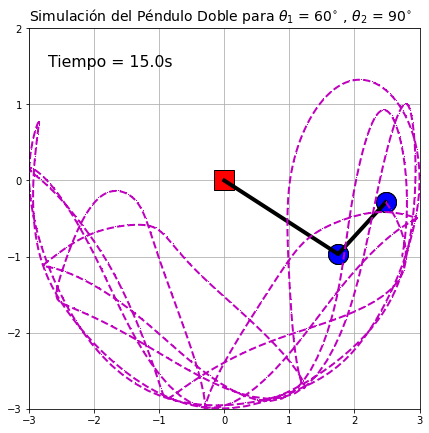

In [26]:
pendulos( l1=2, l2=1, m1=3, m2=4, θ1=60, θ2=90, ω1=90, ω2=250,T=15, N=1200)

Como nota final del trabajo, nótese que la velocidad con que la animación será ejecutada depende directamente del valor que determinemos para los saltos de tiempo `dt` (línea 22 del código) en los que la ecuación diferencial será iterada y resuelta. Así, si queremos una mayor eficacia en el tiempo de ejecución, debemos sacrificar la precisión de la simulación. Y si queremos una mayor precisión de la simulación, debemos esperar un mayor tiempo en la ejecución. Una suposición que tengo, es que este problema en el código podría ser arreglado de alguna manera, sin embargo, no encontré la forma de hacerlo posible. Dejando este pequeño detalle de lado, si se escoge el valor para dt adecuado, la simulación puede llegar a ser muy precisa y relativamente eficiente.